## Computer Vision Mid Test

### Mesyella/2201793281

### 1. Point Processing

### Thresholding

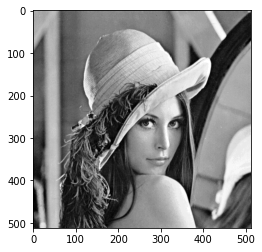

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

gif = cv2.VideoCapture('assets/lena_color.gif')
ret,frame = gif.read()
frame = np.asarray(frame, dtype=np.uint8)
img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

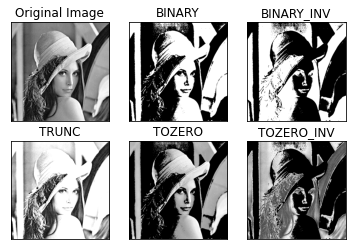

In [5]:
_,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
_,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
_,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
_,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
_,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

There are 5 different thresholding technique.cv2.THRESH_BINARY, If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
cv2.THRESH_BINARY_INV, Inverted or Opposite case of cv2.THRESH_BINARY.
cv.THRESH_TRUNC, If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
cv.THRESH_TOZERO, Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
cv.THRESH_TOZERO_INV, Inverted or Opposite case of cv2.THRESH_TOZERO.

### Gray-Scaling

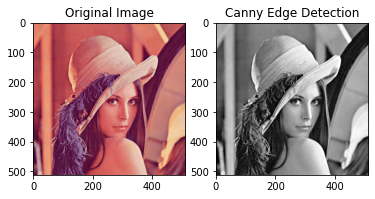

In [14]:
gif = cv2.VideoCapture('assets/lena_color.gif')
ret,frame = gif.read()
frame = np.asarray(frame, dtype=np.uint8)
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
fig.add_subplot(1,2,2)
plt.imshow(imgGray, cmap='gray')
plt.title("Canny Edge Detection")
plt.show(block=True)

### Negative Transformation

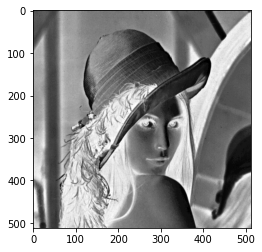

In [16]:
img_not = cv2.bitwise_not(imgGray)
plt.imshow(img_not, cmap = "gray")

### Histogram Equalization

In [17]:
def histogram(image):
    height = image.shape[0]
    width = image.shape[1]
    intensity = np.zeros(256)
    for i in range(height):
        for j in range(width):
            intensity[image[i][j]] += 1
    
    return intensity

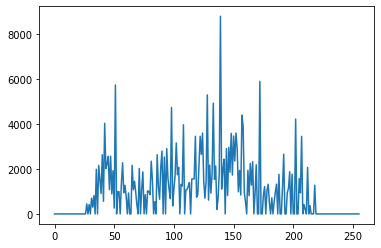

In [18]:
histo = histogram(imgGray)
plt.plot(histo)
plt.show()

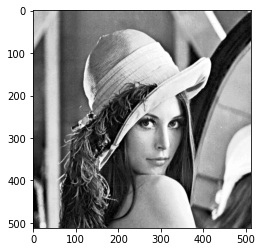

In [19]:
equ = cv2.equalizeHist(imgGray)
plt.imshow(equ, cmap = 'gray')

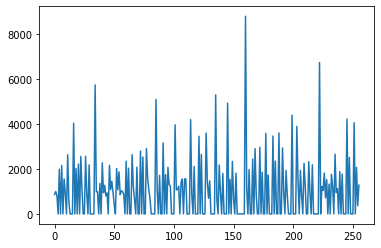

In [20]:
equHisto = histogram(equ)
plt.plot(equHisto)

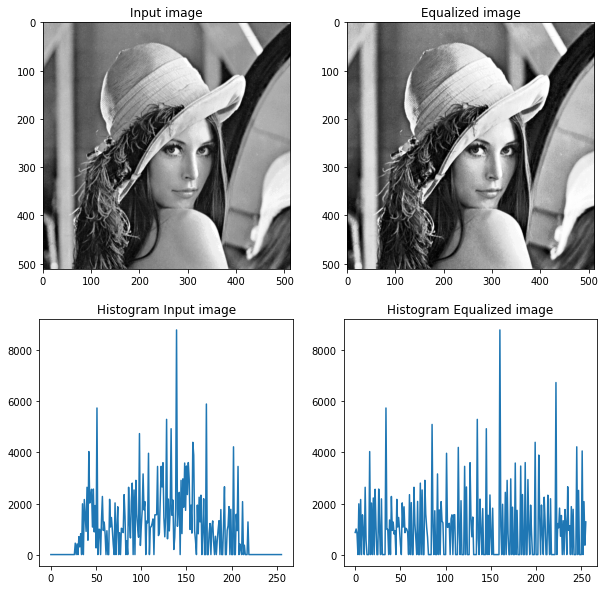

In [21]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
fig.add_subplot(2,2,1)
plt.title('Input image')
plt.imshow(imgGray, cmap = 'gray')
fig.add_subplot(2,2,2)
plt.title('Equalized image')
plt.imshow(equ, cmap = 'gray')
fig.add_subplot(2,2,3)
plt.title('Histogram Input image')
plt.plot(histo)
fig.add_subplot(2,2,4)
plt.title('Histogram Equalized image')
plt.plot(equHisto)